In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Sklearn provides a set of commonly used example datasets. 
# They can be accessed through the datasets submodule.
from sklearn import datasets

# We're going to use the Linnerud dataset to practice Regression in sklearn.

# The Linnerud dataset is a tiny multi-output regression dataset. It consists 
# of three excercise (data) and three physiological (target) variables 
# collected from twenty middle-aged men in a fitness club.
linnerud = datasets.load_linnerud()

# The features of the dataset contain data on 3 exercises
# Chins - number of chinups
# Situps - number of situps
# Jumps - number of jumping jacks

# Note that the features and target come as numpy matrices.
# We'll first load the features into a pandas dataframe.
df = pd.DataFrame(linnerud.data,columns=linnerud.feature_names)

# We'll also add the target to our dataframe.
# Note also that this dataset contains multiple targets.
# We'll only consider one of them: Weight
df['Weight'] = linnerud.target[:,linnerud.target_names.index('Weight')]

# For more information on the dataset, uncomment the print command below
#print(linnerud.DESCR)

# print the first 3 rows
df.head(3)

,Chins,Situps,Jumps,Weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0


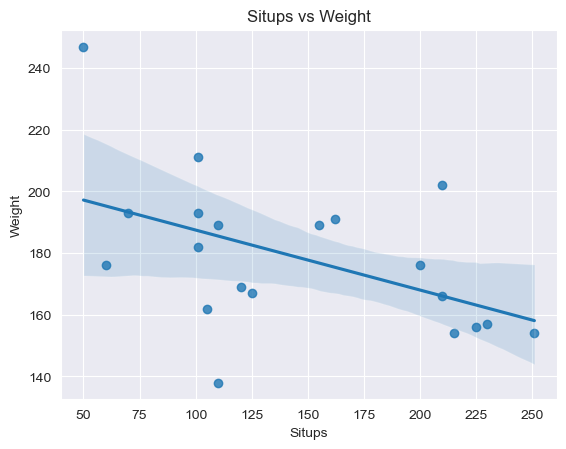

In [3]:
# What is the relationship between Situps and Weight?

# Plot a scatterplot and best-fit line with
#    Situps on the x-asix vs Weight on the y=axis
#    using seaborn sns.regplot()

sns.regplot(x="Situps", y="Weight", data=df)
plt.title("Situps vs Weight")
plt.xlabel("Situps")
plt.ylabel("Weight")
plt.show()

In [4]:
# The above plot should indicate a potentially negative relationship 
#    between Situps and Weight
# How much does Weight go down if Situps goes up?
# To answer this we'll train a simple linear model.

# First import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create a variable X containing the independent variable 'Situps'
# Note that sklearn expects X to be two dimensional
#   so you must use one of the methods discussed in class
#   to return a two dimensional object
X = df[['Situps']]

# Create a variable y containing the dependent variable 'Weight'
# Note that y should only be one dimensional, 
#    so a Series (single column of a dataframe) works fine here
y = df['Weight']

# Instantiate a LinearRegression object with default parameter settings
#   and store as lr
lr = LinearRegression()

# Fit lr using the X and y defined above
lr.fit(X, y)

# Using the learned parameters in coef_,
#   by how much do we expect Weight to go down when Situps goes up by 1?
# Print with a precision of 2
print(f"Weight goes down by {lr.coef_[0]:.2f} when Situps goes up by 1.")

# Using the learned parameter intercept_, 
#   what should we expect weight to be when when Situps is 0?
# Print with a precision of 2
print(f"Expected weight when Situps is 0 is {lr.intercept_:.2f}.")

Weight goes down by -0.19 when Situps goes up by 1.
Expected weight when Situps is 0 is 206.92.


In [8]:
# How is Weight related to all 3 features?

# Create a list containing the 3 feature names we're interested in 
#    as strings: Chins, Situps, Jumps
# Store as feature_names
# We do this to make sure we don't include 'Weight' in the 
#    regression as an independent variable
from sklearn.linear_model import LinearRegression

feature_names = ['Chins', 'Situps', 'Jumps']

# Instantiate a second LinearRegression model with default parameters
#    and store as mlr
# Fit this model using all of the columns in feature_names and our y from above
mlr = LinearRegression()
mlr.fit(df[feature_names], y)

# For each feature name in feature_names, print out the name and 
#    corresponding learned coefficient
# It looks like one of the features actually has a positive relationship. 
# Print coefficient values with a precision of 2.
for feature, coef in zip(feature_names, mlr.coef_):
    print(f"{feature}: {coef:.2f}")

Chins: -0.48
Situps: -0.22
Jumps: 0.09


In [12]:
# NOT REQUIRED

# For those that are interested exploring how statsmodels works
! pip install statsmodels

# Import the statsmodels api as sm
import statsmodels.api as sm

# Store the 3 features from df as X
X = df[feature_names]

# Add a constant to X (in order to learn the bias term) using sm.add_constant()
X = sm.add_constant(X)

# Instantiate and fit an OLS model using X and df.Weight as y 
#   and store as sm_model
# Note that in OLS, the target y is the first parameter!
sm_model = sm.OLS(df.Weight, X).fit()

# Display the model summary
# Note that the coefficients in the summary match the values
#    found above using sklearn
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1.952
Date:                Fri, 11 Oct 2024   Prob (F-statistic):              0.162
Time:                        21:36:23   Log-Likelihood:                -88.876
No. Observations:                  20   AIC:                             185.8
Df Residuals:                      16   BIC:                             189.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.2335     13.451     15.481      0.000     179.718     236.749
Chins         -0.4750      1.393     -0.341      0.738      -3.428       2.478
Situps        -0.2177      0.138     -1.583      0.133      -0.509       0.074
Jumps          0.0931      0.139      0.671      0.512      -0.201       0.387
==============================================================================
Omnibus:                        1.292   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.219
Skew:                           0.077   Prob(JB):                        0.896
Kurtosis:                       3.489   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""